<a href="https://colab.research.google.com/github/yashfirkedata/DL-Critical-Heat-Flux-Prediction/blob/main/Critical_Heat_Flux_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/yashfirkedata/DL-Critical-Heat-Flux-Prediction/main/Data_CHF_Zhao_2020_ATE.csv')
df

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,1,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,2,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,3,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,4,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,5,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0
...,...,...,...,...,...,...,...,...,...,...
1860,1861,Richenderfer,plate,1.01,1500,-0.0218,15.0,120.0,10,9.4
1861,1862,Richenderfer,plate,1.01,1500,-0.0434,15.0,120.0,10,10.4
1862,1863,Richenderfer,plate,1.01,2000,-0.0109,15.0,120.0,10,10.8
1863,1864,Richenderfer,plate,1.01,2000,-0.0218,15.0,120.0,10,10.9


In [3]:
df = df.drop(['id'],axis=1)

In [4]:
# Define the new column names
new_column_names = ['author', 'geometry', 'pressure', 'mass_flux', 'exit_concentration', 'equivalent_diameter', 'hydraulic_diameter', 'channel_length', 'exp_critical_heat_flux']

# Replace the column names wrt to df
df.columns = new_column_names

# **Basic EDA**

In [5]:
df.columns

Index(['author', 'geometry', 'pressure', 'mass_flux', 'exit_concentration',
       'equivalent_diameter', 'hydraulic_diameter', 'channel_length',
       'exp_critical_heat_flux'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   author                  1865 non-null   object 
 1   geometry                1865 non-null   object 
 2   pressure                1865 non-null   float64
 3   mass_flux               1865 non-null   int64  
 4   exit_concentration      1865 non-null   float64
 5   equivalent_diameter     1865 non-null   float64
 6   hydraulic_diameter      1865 non-null   float64
 7   channel_length          1865 non-null   int64  
 8   exp_critical_heat_flux  1865 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 131.3+ KB


In [7]:
df.describe()

,pressure,mass_flux,exit_concentration,equivalent_diameter,hydraulic_diameter,channel_length,exp_critical_heat_flux
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,10.010949,2862.647721,0.016179,9.417212,16.167721,911.340483,3.854638
std,4.282715,1656.412247,0.117575,6.333807,21.182870,726.718974,1.985535
min,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,6.890000,1519.000000,-0.048300,5.600000,5.600000,432.000000,2.400000
50%,10.340000,2590.000000,0.024400,8.500000,10.300000,625.000000,3.500000
75%,13.790000,3933.000000,0.100600,11.100000,15.200000,1778.000000,4.800000
max,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


In [8]:
df.shape

(1865, 9)

In [41]:
[col for col in df if df[col].nunique()==1]

[]

In [9]:
for column in df.columns:
  print('-'*35)
  print(f'No of unique values in {column} are: {df[column].nunique()}')
  print(df[column].unique())

-----------------------------------
No of unique values in author are: 10
['Inasaka' 'Peskov' 'Thompson' 'Weatherhead' 'Williams' 'Beus' 'Janssen'
 'Mortimore' 'Kossolapov' 'Richenderfer']
-----------------------------------
No of unique values in geometry are: 3
['tube' 'annulus' 'plate']
-----------------------------------
No of unique values in pressure are: 114
[ 0.39  0.31  0.33  0.62  0.64  0.91 10.   12.   14.   16.   18.   20.
  0.1   2.14  3.45  3.96  4.03  3.56  3.83  3.9   3.76  3.72  3.93  3.86
  4.1   3.69  4.21  5.03  4.96  4.93  5.07  6.89  7.17  7.    7.28  6.93
  7.03  7.14  7.07  7.34  7.26  6.76  6.86  6.96  6.83  6.79  6.72  6.9
  6.62  7.08  8.96  8.89  8.93  9.   10.45 10.41 10.38 10.24 10.48 10.51
 10.57 11.03 11.   11.1  11.14 11.07 10.96 10.34 10.93 12.07 12.34 12.38
 12.41 12.45 13.79 15.51 17.24 18.27 18.96  2.63  8.27 20.68  5.52 15.17
  6.87  6.85  6.98  7.05  6.91  6.92  6.65  6.78  6.88  6.82  4.13  4.16
  5.54  5.58  5.51  8.3   9.65  9.68  9.51  9.71  6

In [10]:
df.isna().sum()

author                    0
geometry                  0
pressure                  0
mass_flux                 0
exit_concentration        0
equivalent_diameter       0
hydraulic_diameter        0
channel_length            0
exp_critical_heat_flux    0
dtype: int64

In [11]:
df.duplicated().any()

True

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().any()

False

#**Exploratory Data Analysis**

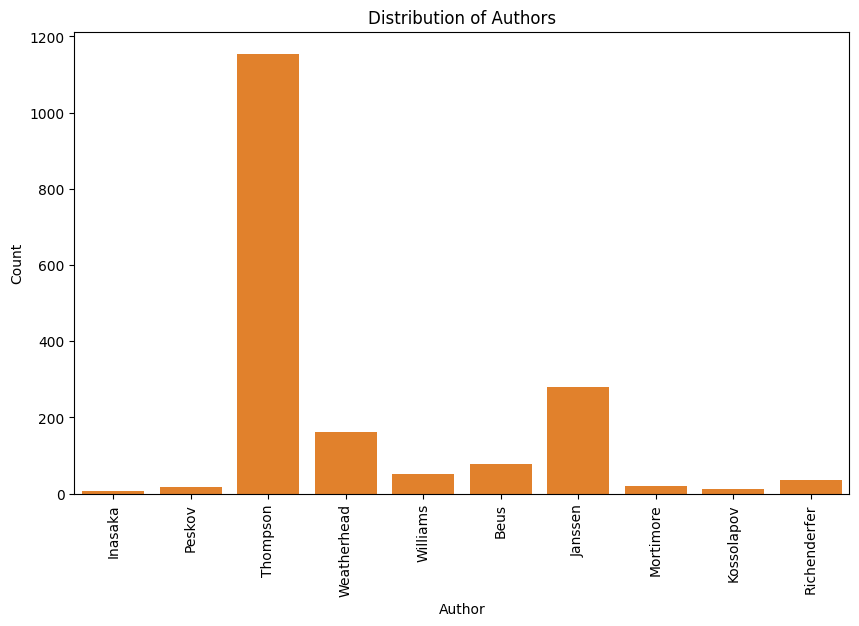

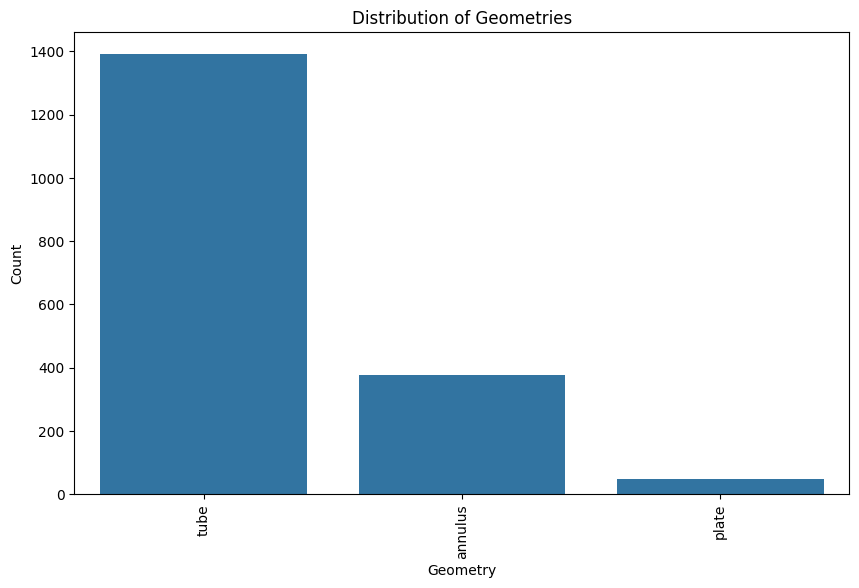

In [14]:
temp = df[["author", "geometry"]]

# Plot the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=temp, x="author")
sns.countplot(data=temp, x="author")
plt.title("Distribution of Authors")
plt.xlabel("Author")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=temp, x="geometry")
plt.title("Distribution of Geometries")
plt.xlabel("Geometry")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

**Observations:**

* Around 70% of the geometry is tube.
* Most occurring author is "Thompson",

In [26]:
# which author uses which geometry?

grouped_df = df.groupby(['author', 'geometry']).size().reset_index(name='count')
grouped_df

,author,geometry,count
0,Beus,annulus,77
1,Inasaka,tube,7
2,Janssen,annulus,281
3,Kossolapov,plate,12
4,Mortimore,annulus,19
5,Peskov,tube,17
6,Richenderfer,plate,36
7,Thompson,tube,1155
8,Weatherhead,tube,161
9,Williams,tube,51


In [27]:
# which author uses which geometry?

grouped_df = df.groupby(['author', 'geometry']).size().reset_index(name='count')
grouped_df

,author,geometry,count
0,Beus,annulus,77
1,Inasaka,tube,7
2,Janssen,annulus,281
3,Kossolapov,plate,12
4,Mortimore,annulus,19
5,Peskov,tube,17
6,Richenderfer,plate,36
7,Thompson,tube,1155
8,Weatherhead,tube,161
9,Williams,tube,51


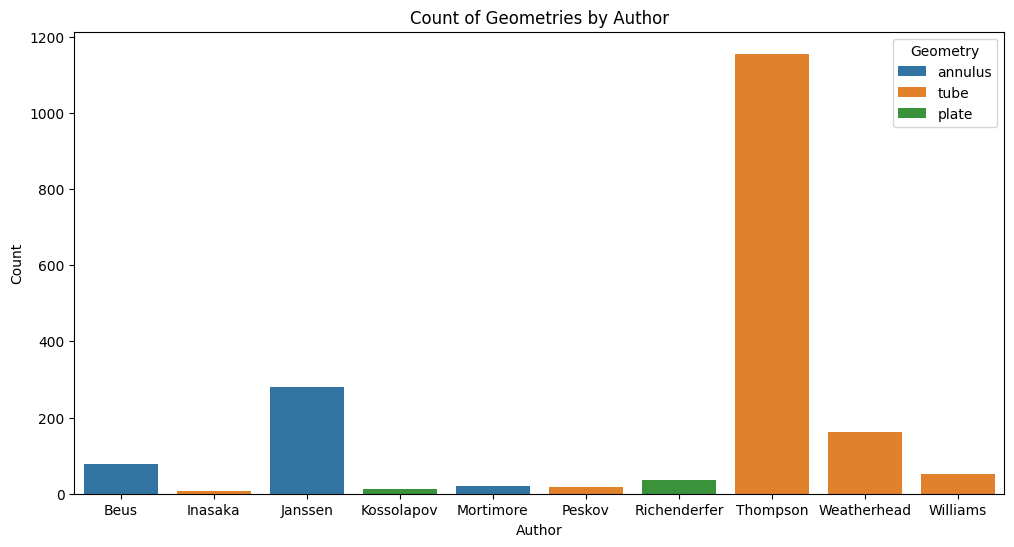

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_df, x='author', y='count', hue='geometry')
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Count of Geometries by Author')
plt.legend(title='Geometry')
plt.show()



### **Distribution plots with respect to each geometry**

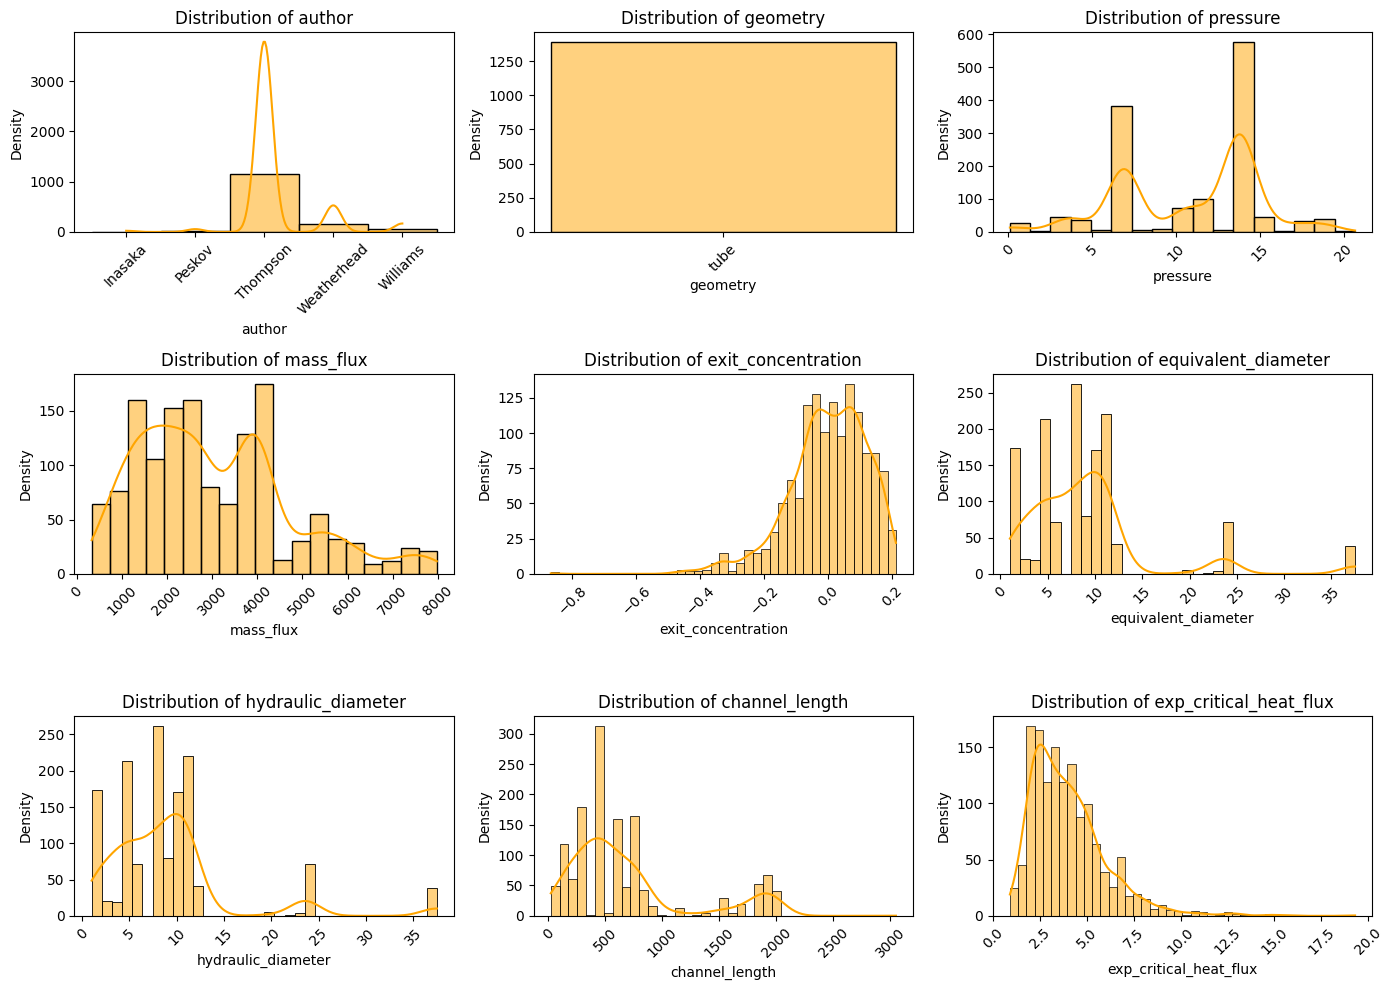

In [36]:
# 1. wrt Tube

Tube = df[df['geometry'] == 'tube']
features = list(df.columns)

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(Tube[feature], kde=True, color='orange')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

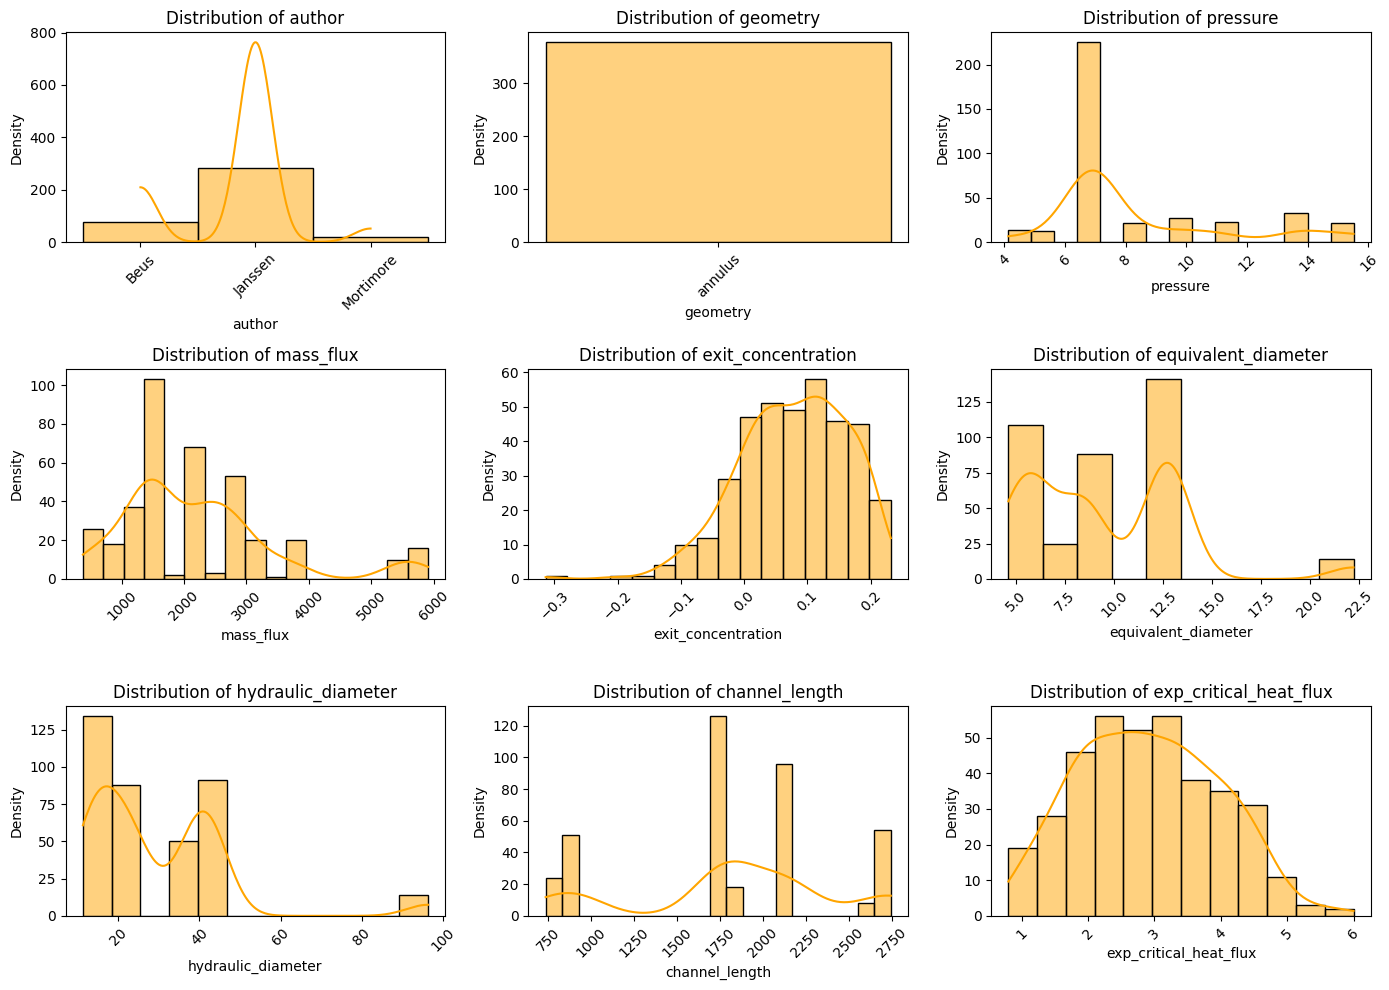

In [37]:
# 2. wrt annulus

annulus = df[df['geometry'] == 'annulus']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(annulus[feature], kde=True, color='orange')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

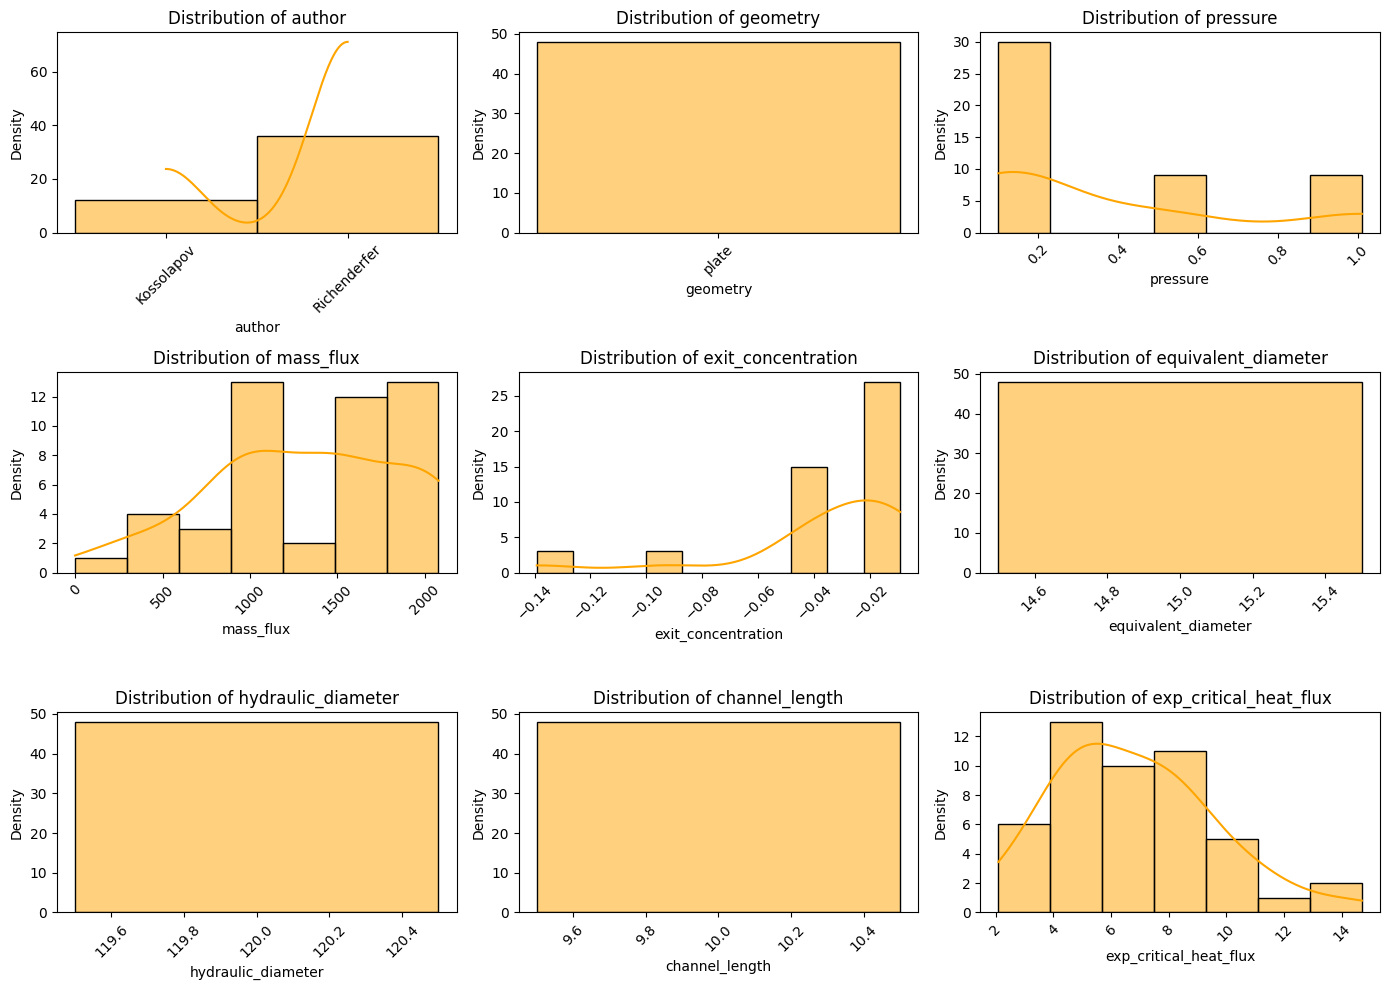

In [39]:
# 3. wrt Plate

plate = df[df['geometry'] == 'plate']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(plate[feature], kde=True, color='orange')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

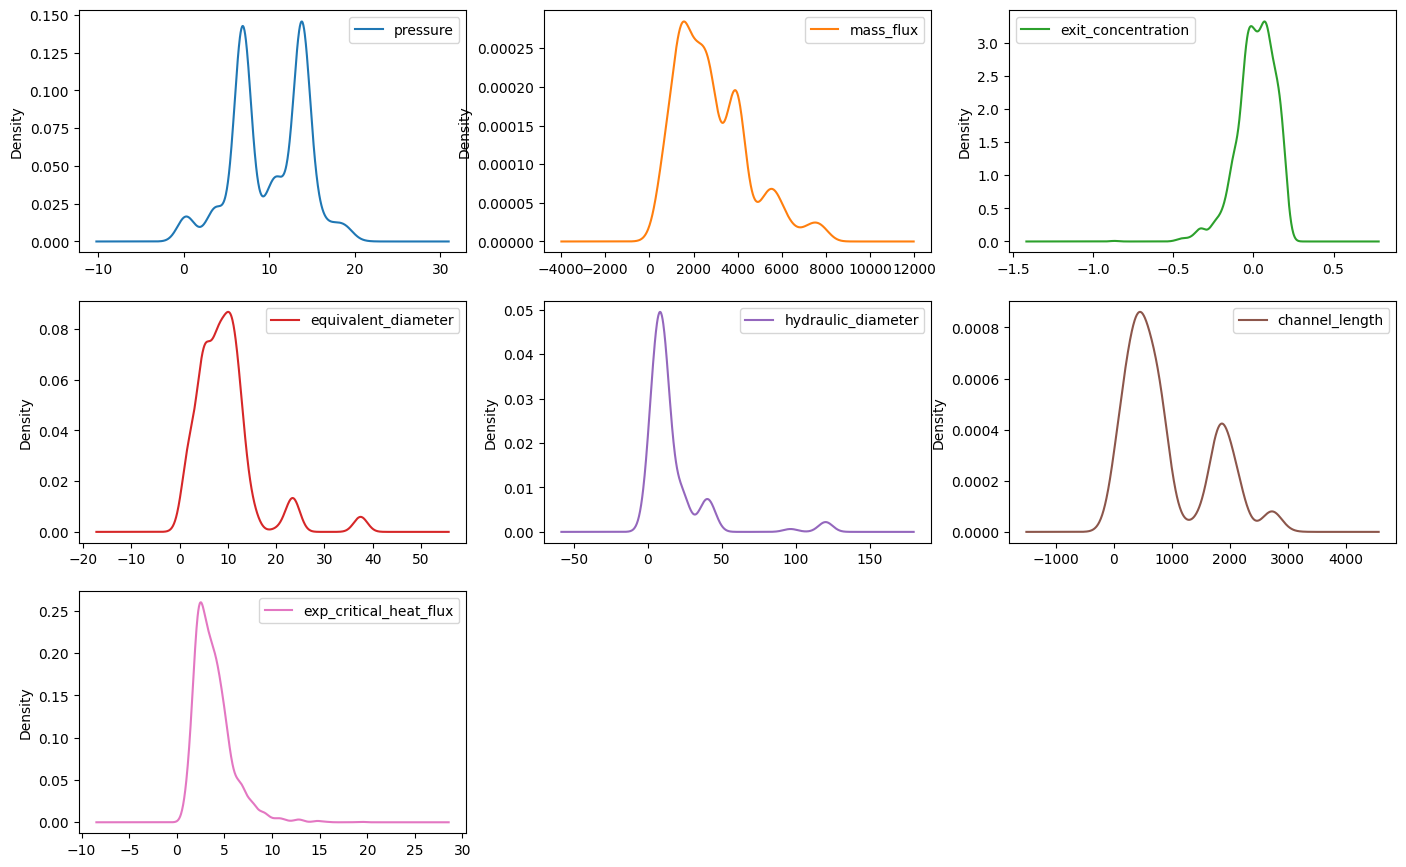

In [43]:
# checking density of columns
df.plot(kind="density",
                subplots=True,
                layout = (6,3),
                figsize=(17,22),
                sharex=False,
                sharey=False);

**Checking Outliers**

In [45]:
df.dtypes

author                     object
geometry                   object
pressure                  float64
mass_flux                   int64
exit_concentration        float64
equivalent_diameter       float64
hydraulic_diameter        float64
channel_length              int64
exp_critical_heat_flux    float64
dtype: object

In [46]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
for i in numeric_columns:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bridge = df[i].quantile(0.25) - (IQR * 1.5)
    upper_bridge = df[i].quantile(0.75) + (IQR * 1.5)

    outliers = df[(df[i] < lower_bridge) | (df[i] > upper_bridge)][i]

    print(f'The percentage of outliers in {i}:', (len(outliers) / len(df) * 100), '%')


The percentage of outliers in pressure: 0.0 %
The percentage of outliers in mass_flux: 2.092511013215859 %
The percentage of outliers in exit_concentration: 2.36784140969163 %
The percentage of outliers in equivalent_diameter: 7.10352422907489 %
The percentage of outliers in hydraulic_diameter: 13.27092511013216 %
The percentage of outliers in channel_length: 0.0 %
The percentage of outliers in exp_critical_heat_flux: 3.359030837004405 %


* I can see some outliers

<Axes: >

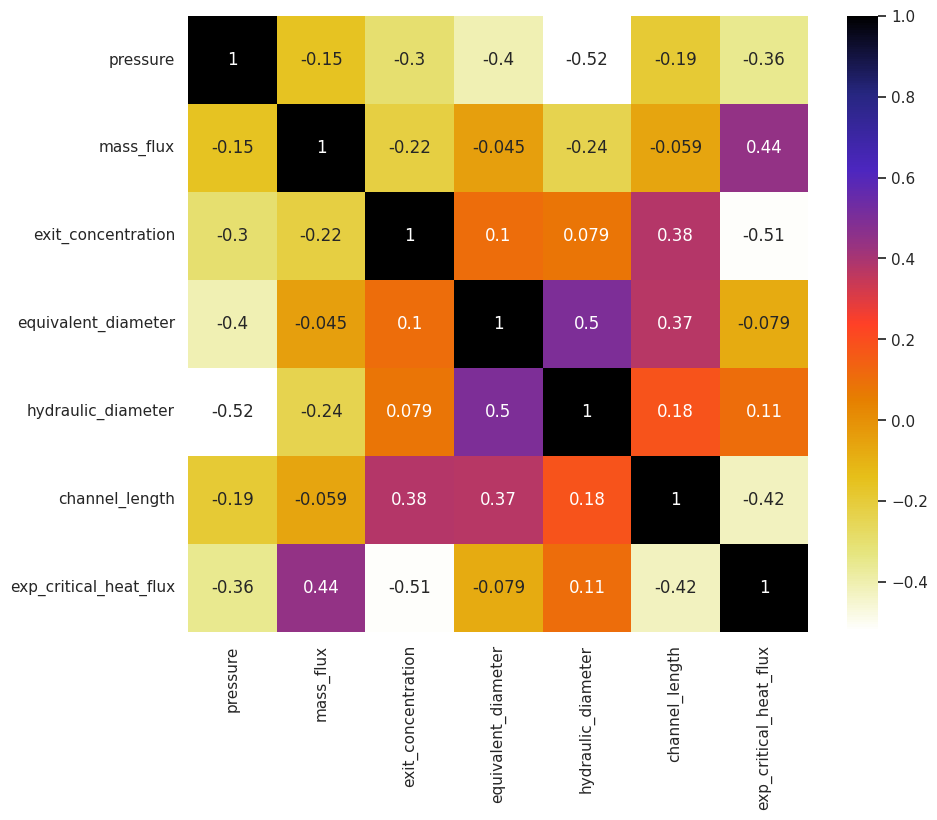

In [49]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.set()
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap=plt.cm.CMRmap_r)

Not alot correlation between features and target variables

---





**EDA DONE! NEXT STEP IS DATA PREPROCESSING AND MODELLING**